In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "./training_csv/"
listdirs = ["Healthy", "Motor_1_Steady_state_error", "Motor_1_Stuck", "Motor_2_Steady_state_error", "Motor_2_Stuck", "Motor_3_Steady_state_error", "Motor_3_Stuck", "Motor_4_Steady_state_error", "Motor_4_Stuck"]
trajectories = np.empty((2, 400, 1000, 6))

for folder in listdirs:
    numpy_array = np.empty((2, 1000, 6))
    folderpath = os.path.join(path, folder)
    with os.scandir(folderpath) as it:
        for file in it:
            if file.is_file() and os.path.splitext(file.path)[1] == ".csv":
                file_array = np.genfromtxt(file.path, delimiter=",", usemask=False)
                numpy_array = np.append(numpy_array, [file_array], axis=0)
    trajectories = np.append(trajectories, [numpy_array[2:]], axis=0)

trajectories = trajectories[2:]
trajectories[:,:,:,3:] -= trajectories[:,:,:,:3]

In [30]:
print(trajectories.shape)
for n, folder in enumerate(trajectories):
    print(f"{n} : {np.average(np.average(folder[:,:,3:], axis=0), axis=0)}")

(9, 400, 1000, 6)
0 : [ 8.87365132e-06 -2.17865311e-06  3.67702500e-05]
1 : [-4.80008168e-04 -2.03515010e-04  3.21719630e-05]
2 : [-8.09564106e-04  1.26648099e-03  3.61245738e-05]
3 : [-0.00023638  0.00018816 -0.00129307]
4 : [0.00273062 0.00221205 0.01128039]
5 : [ 0.00015662  0.0003193  -0.00054543]
6 : [ 0.00073692 -0.00024701  0.00644001]
7 : [ 4.84711828e-05 -1.58192514e-04 -2.42274747e-04]
8 : [0.00011958 0.00060154 0.00171827]


In [31]:
averages = np.average(trajectories[:,:,:,3:], axis=1)
y_min = np.min(averages)
y_max = np.max(averages)
print(averages.shape, y_max, y_min)

(9, 1000, 3) 0.01728863803696872 -0.0075560234981675535


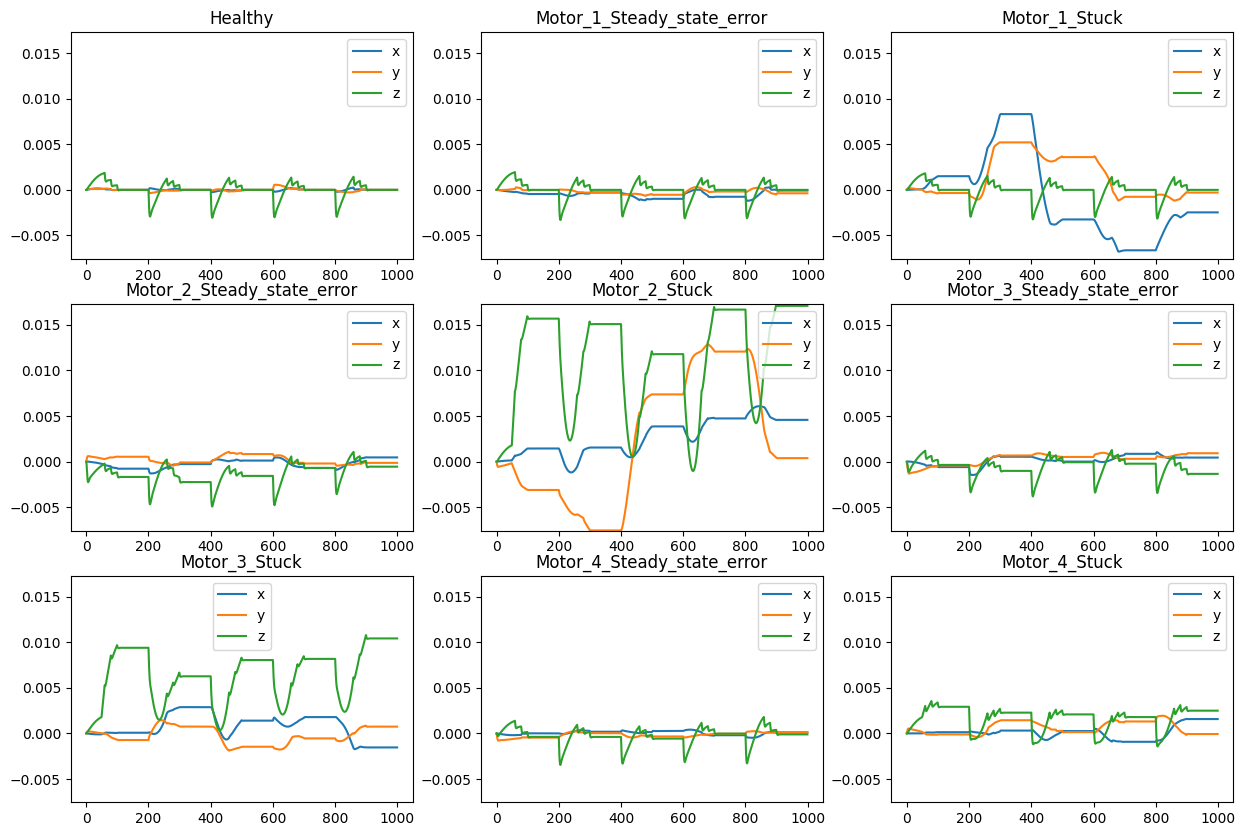

In [37]:
fig, plots = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, row in enumerate(plots):
    for n, subplot in enumerate(row):
        subplot.set_ylim([y_min, y_max])
        subplot.set_title(listdirs[i*3+n])
        subplot.plot(np.arange(1000), averages[i*3+n,:,:], label=("x", "y", "z"))
        subplot.legend()
plt.show()

In [22]:
real_trajectories = np.zeros((2, 10, 1000, 6))

for folder in listdirs:
    error_type = np.zeros((2, 1000, 6))
    folderpath = os.path.join("dataset/testDatasets/20241008/", folder)
    with os.scandir(folderpath) as it:
        for file in it:
            if os.path.splitext(file.path)[1] == ".csv":
                real_trajectory = np.genfromtxt(file.path, delimiter=",")
                error_type = np.append(error_type, [real_trajectory], axis=0)
    real_trajectories = np.append(real_trajectories, [error_type[2:]], axis=0)
real_trajectories = real_trajectories[2:]
real_trajectories[:,:,:,3:] -= real_trajectories[:,:,:,:3]

In [24]:
print(real_trajectories.shape)

(9, 10, 1000, 6)


In [ ]:
real_averages = np.average(real_trajectories[:,:,:,3:], axis=1)
real_ymin = min(np.min(real_averages), y_min)
real_ymax = max(np.max(real_averages), y_max)
print(real_averages.shape)

(9, 1000, 3)


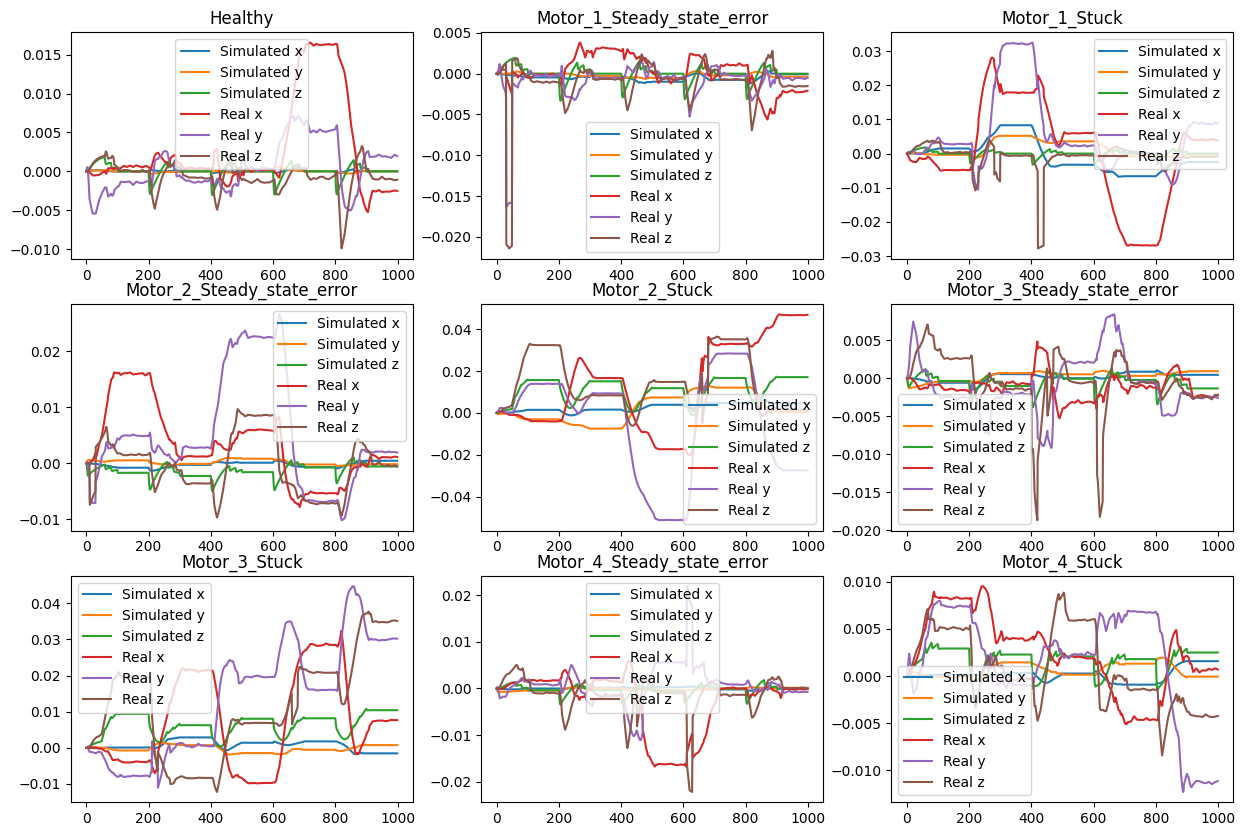

In [ ]:
fig, plots = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, row in enumerate(plots):
    for n, subplot in enumerate(row):
#        subplot.set_ylim([real_ymin, real_ymax])
        subplot.set_title(listdirs[i*3+n])
        subplot.plot(np.arange(1000), averages[i*3+n,:,:], label=("Simulated x", "Simulated y", "Simulated z"))
        subplot.plot(np.arange(1000), real_averages[i*3+n,:,:], label=("Real x", "Real y", "Real z"))
        subplot.legend()
plt.show()

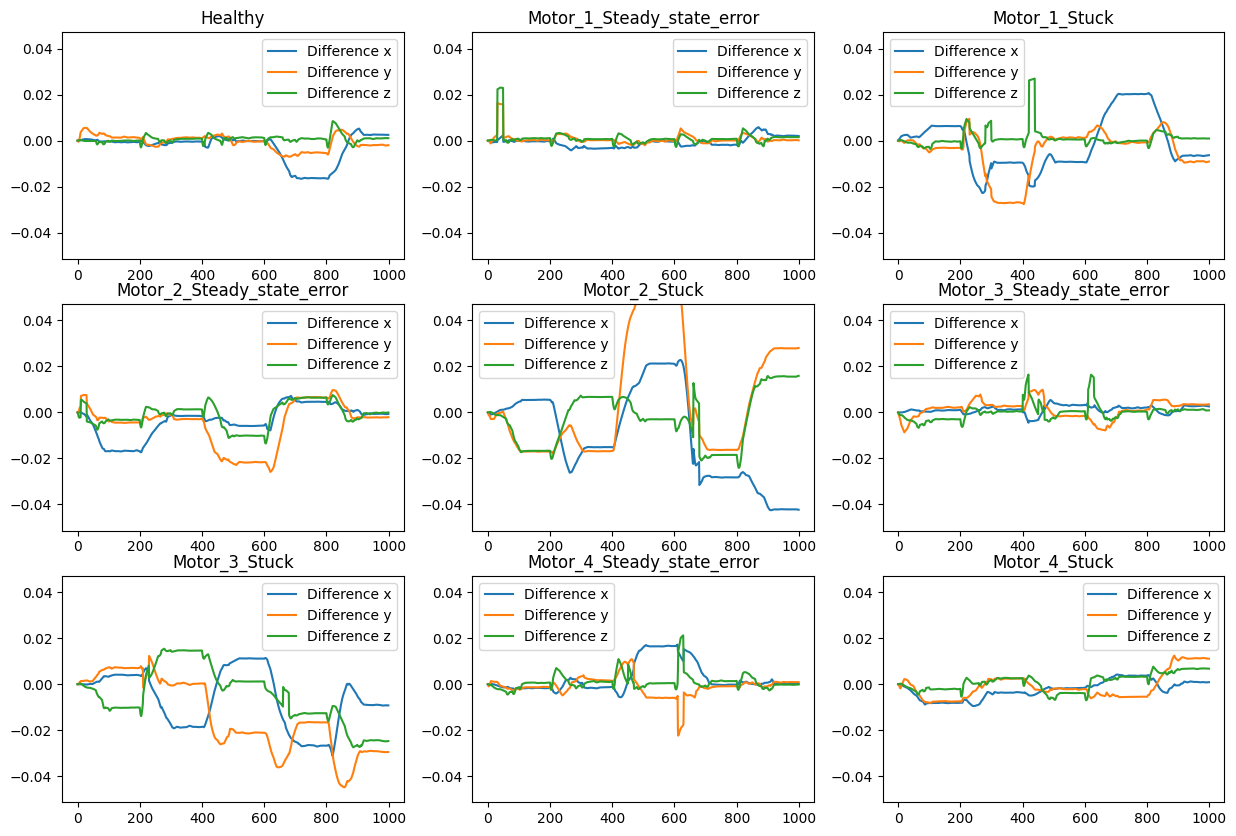

In [39]:
fig, plots = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, row in enumerate(plots):
    for n, subplot in enumerate(row):
        subplot.set_ylim([real_ymin, real_ymax])
        subplot.set_title(listdirs[i*3+n])
        subplot.plot(np.arange(1000), averages[i*3+n,:,:] - real_averages[i*3+n,:,:], label=("Difference x", "Difference y", "Difference z"))
        subplot.legend()
plt.show()

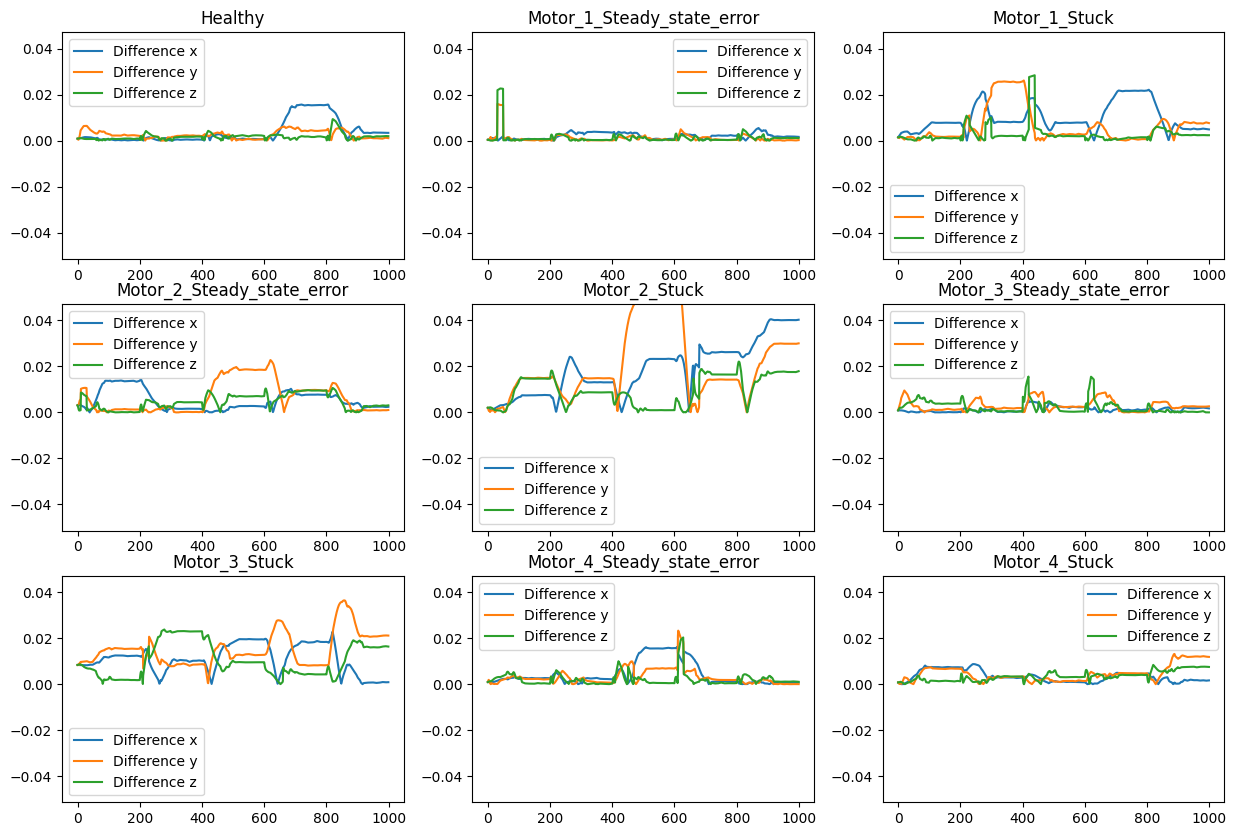

In [44]:
fig, plots = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i, row in enumerate(plots):
    for n, subplot in enumerate(row):
        subplot.set_ylim([real_ymin, real_ymax])
        subplot.set_title(listdirs[i*3+n])
        subplot.plot(np.arange(1000), np.abs((averages[i*3+n,:,:] - np.average(averages[i*3+n])) - (real_averages[i*3+n,:,:] - np.average(real_averages[i*3+n]))), label=("Difference x", "Difference y", "Difference z"))
        subplot.legend()
plt.show()